## STAT 201 Project Proposal


Felix Ma 22972558

Kerie Galvez 83812586

Isabelle Partovi 20390308

Xinrui Wang 93514867 

### Canada Population Aging Problem Research

### Introduction

Around the world especially in developed countries, as the fertility rates decline and average life expectancy increases, the proportion of the elderly population in the country's population is growing. and population ageing is becoming a global concern. As the aging of the population may cause labour shortage and the increment of government social security burden (Yoshino & Miyamoto, 2017), the aging of the population has now become a global concern. The Canadian population is aging over time. Canada's governments, funding agencies, researchers, and health and social care providers are all grappling with the challenge of population aging (Ries, 2010). This project aims to compare the age distribution in Canada between 2011 and 2016 to find out some features of the population aging problem in Canada. The distribution and data feature relevant to elder people are helpful for guiding the health care and other requirements of this aging generation (Ries, 2010).


The dataset used in this project is retrieved from Statistic Canada (Government of Canada, 2019). It includes the information of age in single years, average age, population, gender, location, and years in Canada. As the proportion of the population aged over 65 is identified as the index of population aging problem (Yoshino & Miyamoto, 2017). We choose this proportion as the location parameter and compares this proportion between 2011 and 2016. Since the population is too large (above 33,000,000), in this project we will build samples with sizes around 3000 (about 0.0001 of the population) to test whether there is a difference in the proportion of the population aged over 65 between 2011 and 2016. The standard deviation and sampling distribution of the proportion will also be investigted in this project. The conclusion of the findings of the project and limitations will also be discussed in the discussion part. 


### Preliminary Results

In [4]:
### loading the packages
library(tidyverse)
library(dplyr)
library(repr)
library(digest)
library(infer)

Warning message:
"package 'tidyverse' was built under R version 4.0.2"
-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.2"
Warning message:
"package 'tibble' was built under R version 4.0.2"
Warning message:
"package 'tidyr' was built under R version 4.0.2"
Warning message:
"package 'readr' was built under R version 4.0.2"
Warning message:
"package 'purrr' was built under R version 4.0.2"
Warning message:
"package 'dplyr' was built under R version 4.0.2"
Warning message:
"package 'stringr' was built under R version 4.0.2"
Warning message:
"package 'forcats' was built under R version 4.0.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [5]:
### reading the data
url_2011 <- "https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/File.cfm?S=0&LANG=E&A=R&PID=109523&GID=1235625&D1=1&D2=0&D3=0&D4=0&D5=0&D6=0&OFT=CSV"
raw_2011 <- read_csv(url_2011, skip=4)
colnames(raw_2011) <- c("age", "total", "male", "female", "na")
ages <- as.character(0:100)
raw_2011[4,1] <- "0"
raw_2011[126,1] <- "100"
cleaned_2011_data <- raw_2011 %>%
                     select(1:4) %>%
                     filter(age %in% ages)
dat_2011 <- transform(cleaned_2011_data, age=as.numeric(age))
url_2016 <- "https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/File.cfm?S=0&LANG=E&A=R&PID=109523&GID=1235625&D1=0&D2=0&D3=0&D4=0&D5=0&D6=0&OFT=CSV"
raw_2016 <- read_csv(url_2016, skip=4)
colnames(raw_2016) <- c("age", "total", "male", "female", "na")
ages <- as.character(0:100)
raw_2016[4,1] <- "0"
raw_2016[126,1] <- "100"
cleaned_2016_data <- raw_2016 %>%
                     select(1:4) %>%
                     filter(age %in% ages)
dat_2016 <- transform(cleaned_2016_data, age=as.numeric(age))

New names:
* `` -> ...5

Warning message:
"One or more parsing issues, see `problems()` for details"
Rows: 130 Columns: 5

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Age (in single years) and average age (127)
dbl (3): Total - Sex, Male, Female
lgl (1): ...5


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

New names:
* `` -> ...5

Warning message:
"One or more parsing issues, see `problems()` for details"
Rows: 130 Columns: 5

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Age (in single years) and average age (127)
dbl (3): Total - Sex, Male, Female
lgl (1): ...5


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [31]:
### data wrangling
combined_dat <- dat_2011 %>%
             left_join(dat_2016, by="age")
colnames(combined_dat) <- c("age", "total_2011", "male_2011", "female_2011", "total_2016", "male_2016", "female_2016")
combined_dat <- combined_dat %>% select(age, total_2011, total_2016)
combined_new <- combined_dat%>%
                pivot_longer(cols= total_2011:total_2016,
                             values_to="pop",
                             names_to="year")
obs_2016<- tibble(obs_2016=rep(0:100, dat_2016$total))
obs_2011<- tibble(obs_2011=c(rep(0:100, dat_2011$total), rep(NA, 1675085)))
obs_2011_noNA <- tibble(obs_2011_noNA,rep(0:100, dat_2011$total))
obs <- tibble(obs_2011, obs_2016)
obs_new <- obs %>%
           pivot_longer(cols= everything(),
                        names_to = "year",
                        values_to = "dat")

In [11]:
head(combined_new)
head(obs_new)

age,year,pop
<dbl>,<chr>,<dbl>
0,total_2011,367925
0,total_2016,369730
1,total_2011,375605
1,total_2016,372615
2,total_2011,379645
2,total_2016,378880


year,dat
<chr>,<int>
obs_2011,0
obs_2016,0
obs_2011,0
obs_2016,0
obs_2011,0
obs_2016,0


Warning message:
"Removed 1675085 rows containing non-finite values (stat_boxplot)."


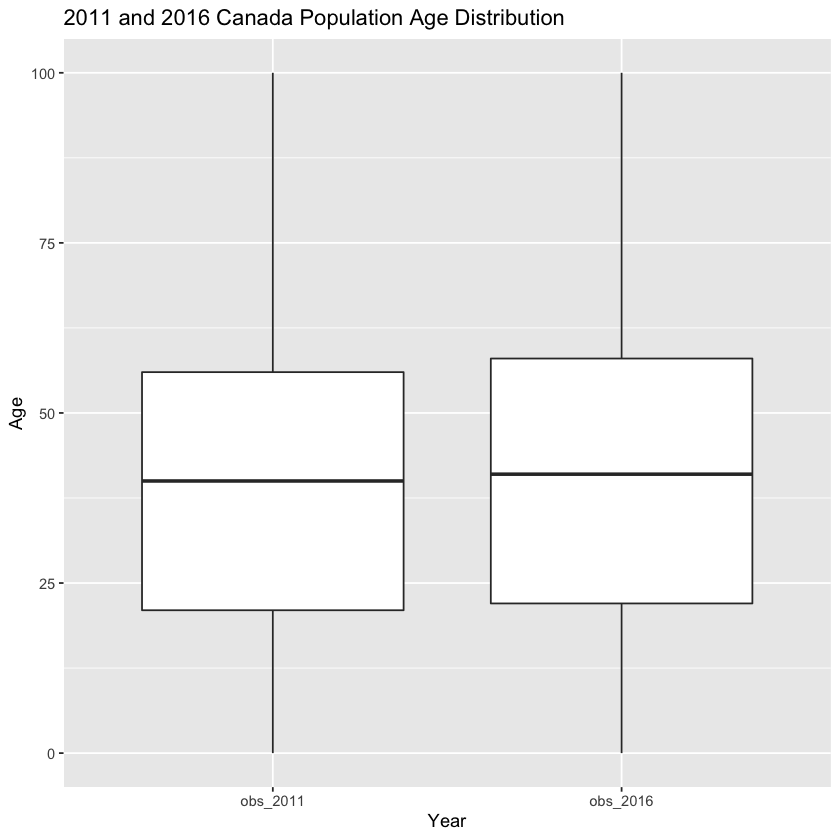

In [12]:
### Boxplots to compare data distribution between 2011 and 2016
box <- obs_new %>%
       ggplot(aes(x=year, y=dat))+
       geom_boxplot()+
       labs(x="Year", y="Age")+
       ggtitle("2011 and 2016 Canada Population Age Distribution")
box

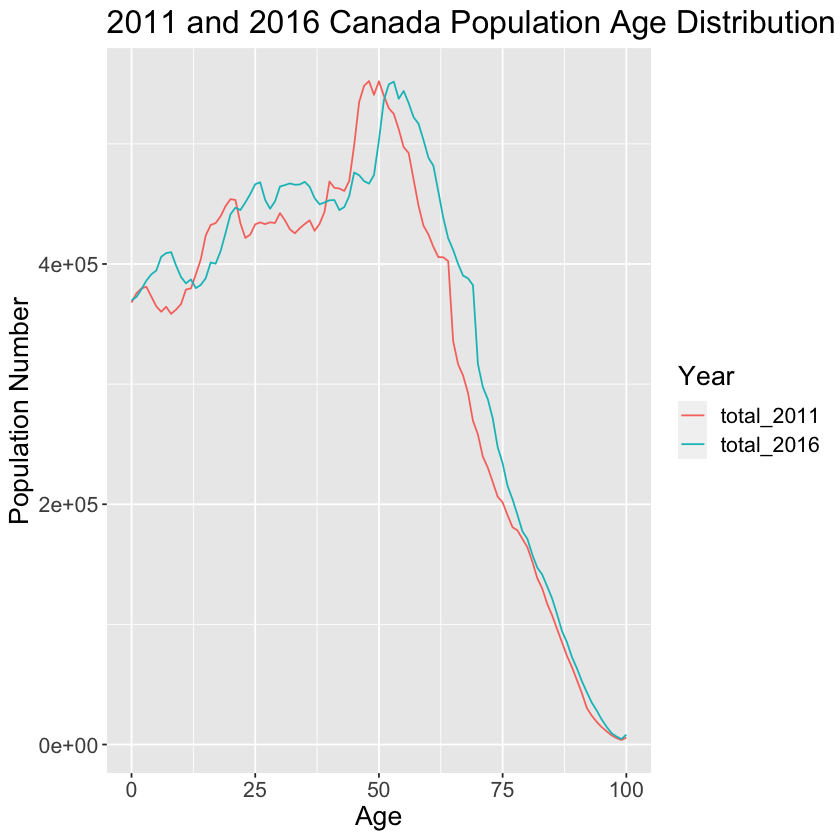

In [13]:
### Population distribution between 2011 and 2016
dist_aging <- combined_new %>%
              ggplot(aes(x=age, y=pop, group = year, color = year)) +
              geom_line()+
              labs(x="Age", y="Population Number", col="Year")+
              theme(text = element_text(size=16))+
              ggtitle("2011 and 2016 Canada Population Age Distribution")
dist_aging

In [14]:
### Calculating the Population Proportion of aged over 65 in 2011 and 2016
total_pop_2011 <- sum(combined_dat$total_2011)
aged_over_65 <- combined_dat%>%
                filter(age >= 65)
prop_over65_2011 <- sum(aged_over_65$total_2011)/total_pop_2011
prop_over65_2011
total_pop_2016 <- sum(combined_dat$total_2016)
prop_over65_2016 <- sum(aged_over_65$total_2016)/total_pop_2016
prop_over65_2016

[1] 0.1477162

[1] 0.1688575

In [15]:
### Single sample proportion of population aged over 65 in 2011 and 2016
set.seed(123)
sample1 <- rep_sample_n(obs_2011, size=3000, replace = FALSE)
aged_over_65_sample1 <- filter(sample1, obs_2011 >= 65)
sample1_prop <- nrow(aged_over_65_sample1)/3000
sample1_prop
sample3 <- rep_sample_n(obs_2016, size=3000, replace = FALSE)
aged_over_65_sample3 <- filter(sample3, obs_2016 >= 65)
sample3_prop <- nrow(aged_over_65_sample3)/3000
sample3_prop

[1] 0.1453333

[1] 0.1606667

In [32]:
### sampling distribution of the proportion of population aged over 65 in 2011
set.seed(123)
sample2 <- rep_sample_n(obs_2011_noNA, size=3000, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65 = mean(obs_2011_noNA >= 65))


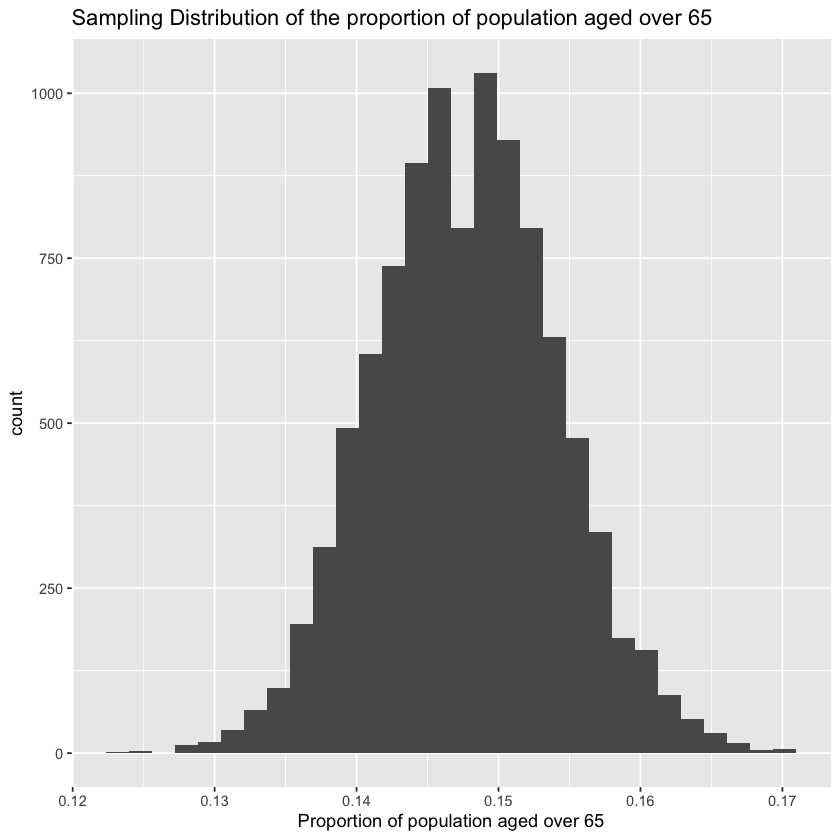

In [34]:
sample2_dist <- sample2 %>%
                ggplot(aes(x = prop_over_65)) +
                geom_histogram(bins=30) +
                xlab("Proportion of population aged over 65") +
                ggtitle("Sampling Distribution of the proportion of population aged over 65")
sample2_dist

Standard Deviation of the proportion of population aged over 65 in 2011

In [35]:
sd(sample2$prop_over_65)

[1] 0.006436891

sampling distribution of the proportion of population aged over 65 in 2016

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



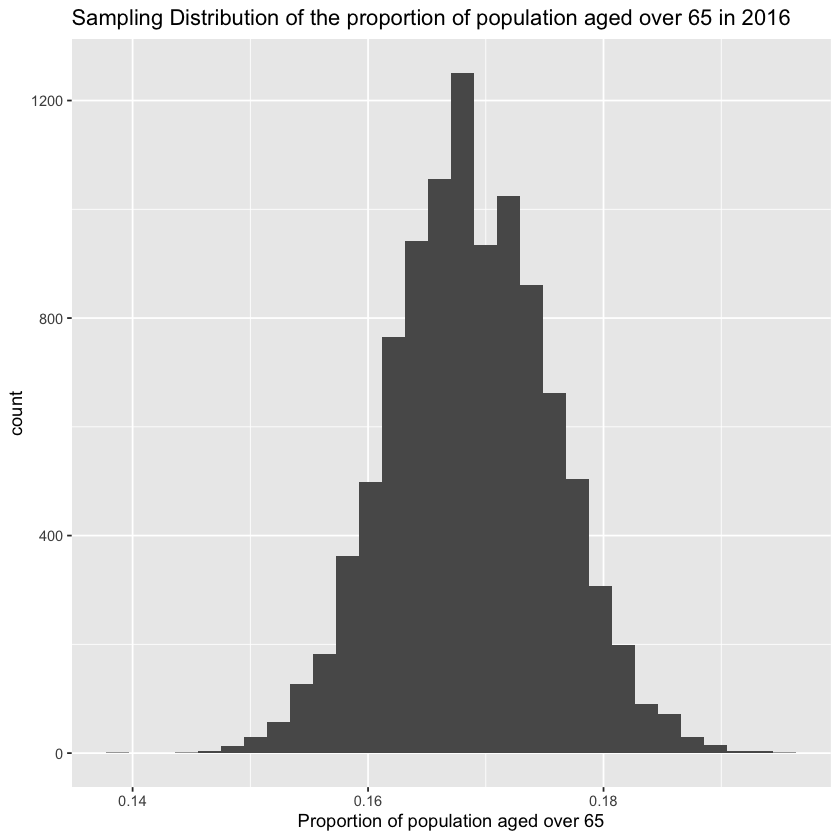

In [37]:
set.seed(123)
sample4 <- rep_sample_n(obs_2016, size=3000, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65 = mean(obs_2016>=65))
sample4_dist <- sample4%>%
                ggplot(aes(x = prop_over_65)) +
                geom_histogram() +
                xlab("Proportion of population aged over 65") +
                ggtitle("Sampling Distribution of the proportion of population aged over 65 in 2016")
sample4_dist

Standard Deviation of the proporttion of population aged over 65 in 2016

In [38]:
sd(sample4$prop_over_65)

[1] 0.006819378

replicate,prop_over_65
<int>,<dbl>
1,0.1446667
2,0.1520000
3,0.1406667
4,0.1483333
5,0.1423333
6,0.1486667


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



replicate,prop_over_65
<int>,<dbl>
1,0.1666667
2,0.1743333
3,0.1740000
4,0.1753333
5,0.1680000
6,0.1616667


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



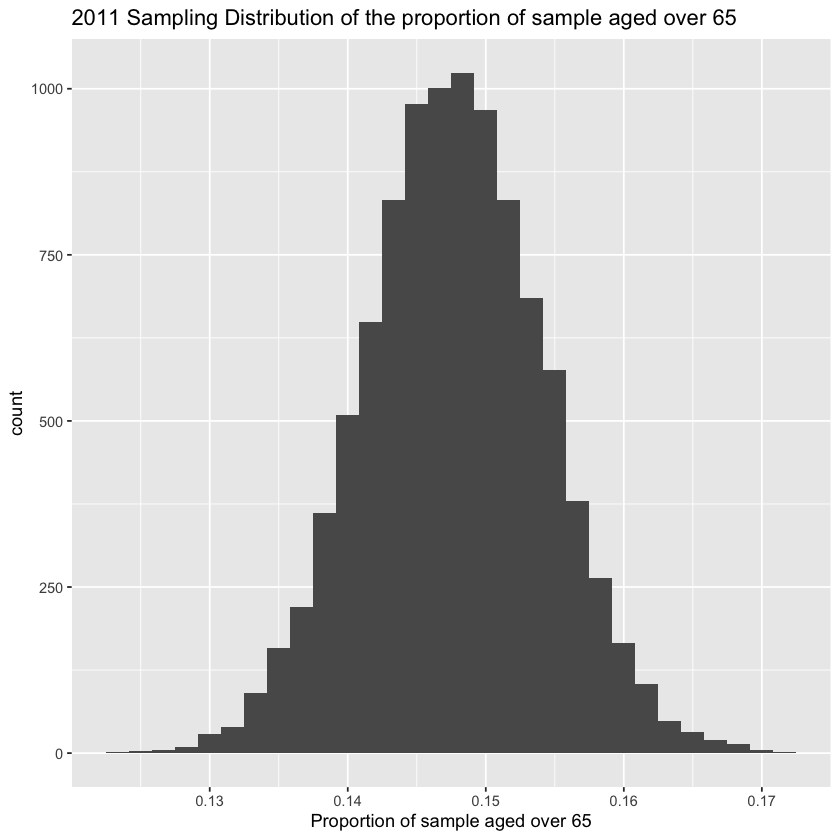

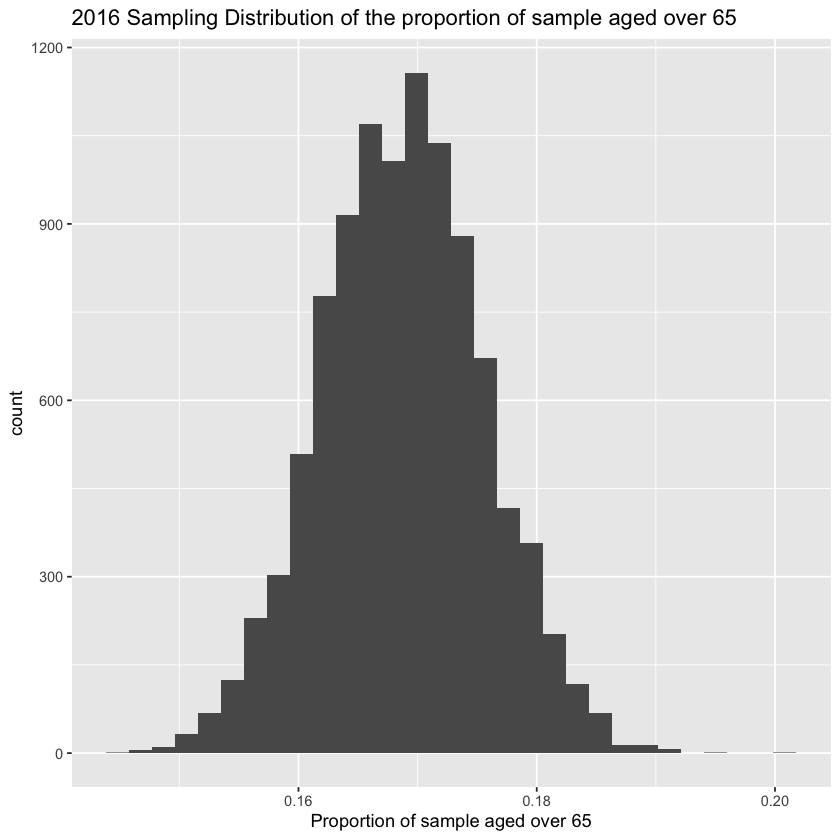

In [37]:
### bootstrap 2011
set.seed(123)
boot_2011_sample <- rep_sample_n(obs_2011_noNA, size=3000, replace = TRUE, rep=10000) %>%
                    group_by(replicate) %>%
                    summarise(prop_over_65 = mean(obs_2011_noNA >=65))
boot_2011_dist <- boot_2011_sample %>%
                ggplot(aes(x = prop_over_65)) +
                geom_histogram() +
                xlab("Proportion of sample aged over 65") +
                ggtitle("2011 Sampling Distribution of the proportion of sample aged over 65")
head(boot_2011_sample)
boot_2011_dist
### bootstrap 2016
boot_2016_sample <- rep_sample_n(obs_2016, size=3000, replace = TRUE, rep=10000) %>%
                    group_by(replicate) %>%
                    summarise(prop_over_65 = mean(obs_2016 >=65))
boot_2016_dist <- boot_2016_sample %>%
                ggplot(aes(x = prop_over_65)) +
                geom_histogram() +
                xlab("Proportion of sample aged over 65") +
                ggtitle("2016 Sampling Distribution of the proportion of sample aged over 65")
head(boot_2016_sample)
boot_2016_dist


In [43]:
### Hypothesis Testing
hytest <- t.test(x = boot_2016_sample$prop_over_65, 
           y = boot_2011_sample$prop_over_65, 
           paired = FALSE,
           alternative = 'greater')
hytest


	Welch Two Sample t-test

data:  boot_2016_sample$prop_over_65 and boot_2011_sample$prop_over_65
t = 224.94, df = 19951, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.02092707        Inf
sample estimates:
mean of x mean of y 
0.1688013 0.1477201 


In [86]:
### Asymptotics Analysis 2011
set.seed(123)
asy_sample2011_300 <- rep_sample_n(obs_2011_noNA, size=300, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2011 = mean(obs_2011_noNA >= 65))
asy_sample2011_3000 <- rep_sample_n(obs_2011_noNA, size=3000, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2011 = mean(obs_2011_noNA >= 65))
asy_sample2011_30000 <- rep_sample_n(obs_2011_noNA, size=30000, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2011 = mean(obs_2011_noNA >= 65))

In [91]:

sample300_2011_dist <- asy_sample2011_300 %>%
                ggplot(aes(x = prop_over_65_2011)) +
                geom_histogram(bins=30) +
                xlab("Proportion of population aged over 65") +
                ggtitle("2011, size 300")+
                geom_vline(xintercept=mean(asy_sample2011_3000$prop_over_65_2011), color="red")+
                annotate("text", x=mean(asy_sample2011_3000$prop_over_65_2011), y=-20, label="0.147556", color="red")
sample3000_2011_dist <- asy_sample2011_3000 %>%
                ggplot(aes(x = prop_over_65_2011)) +
                geom_histogram(bins=30) +
                xlab("Proportion of population aged over 65") +
                ggtitle("2011, size 3000")+
                geom_vline(xintercept=mean(asy_sample2011_3000$prop_over_65_2011), color="red")+
                annotate("text", x=mean(asy_sample2011_3000$prop_over_65_2011), y=-20, label="0.1477228", color="red")
sample30000_2011_dist <- asy_sample2011_30000 %>%
                ggplot(aes(x = prop_over_65_2011)) +
                geom_histogram(bins=30) +
                xlab("Proportion of population aged over 65") +
                ggtitle("2011, size 30000")+
                geom_vline(xintercept=mean(asy_sample2011_30000$prop_over_65_2011), color="red")+
                annotate("text", x=mean(asy_sample2011_30000$prop_over_65_2011), y=-20, label="0.1477175", color="red")

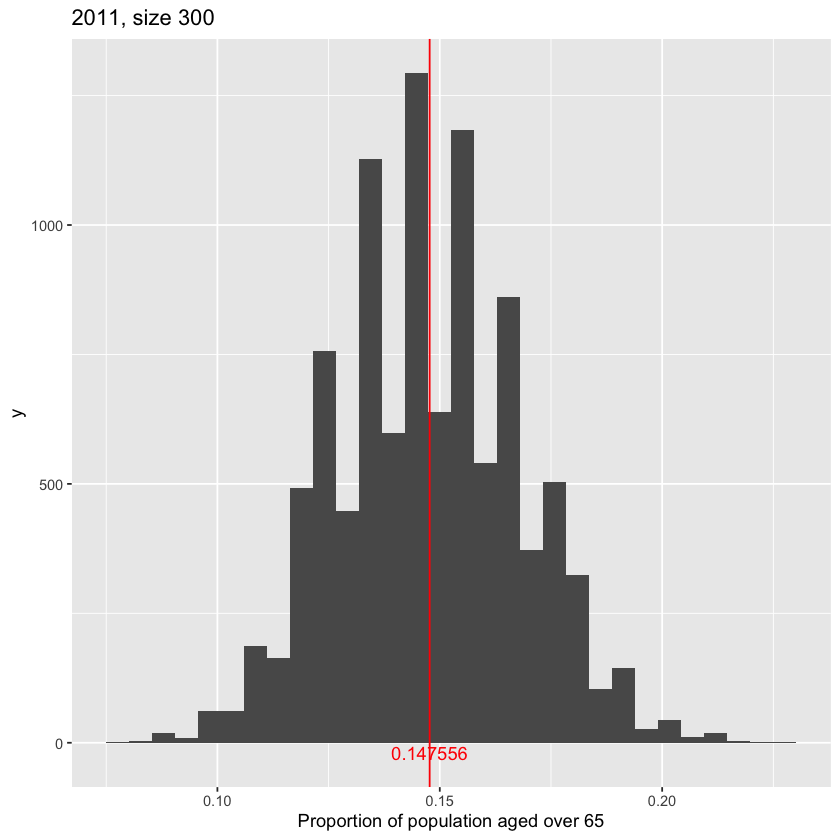

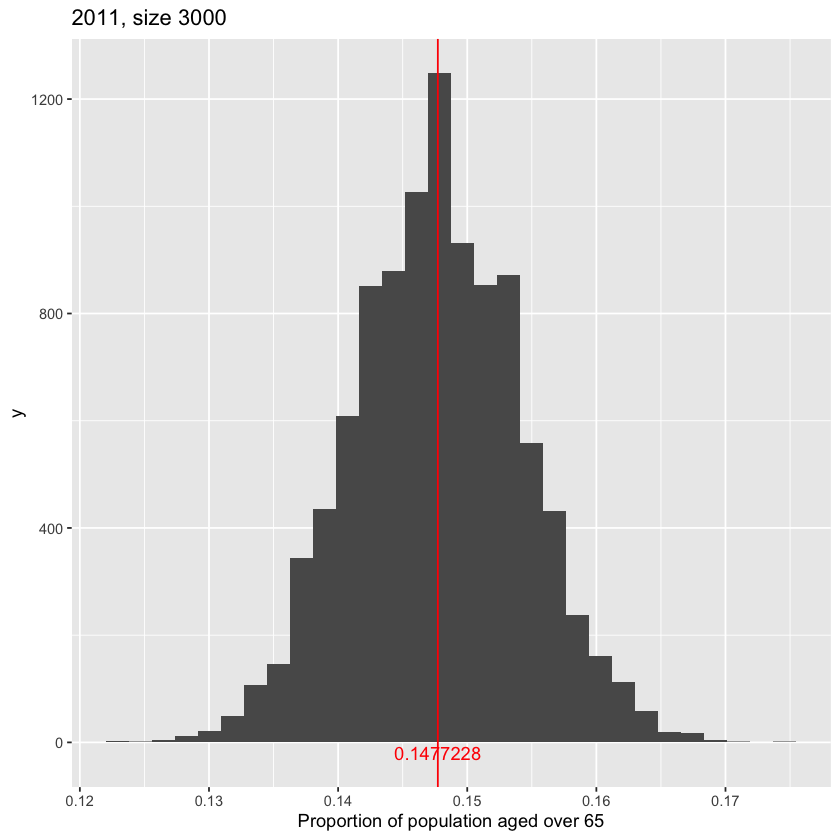

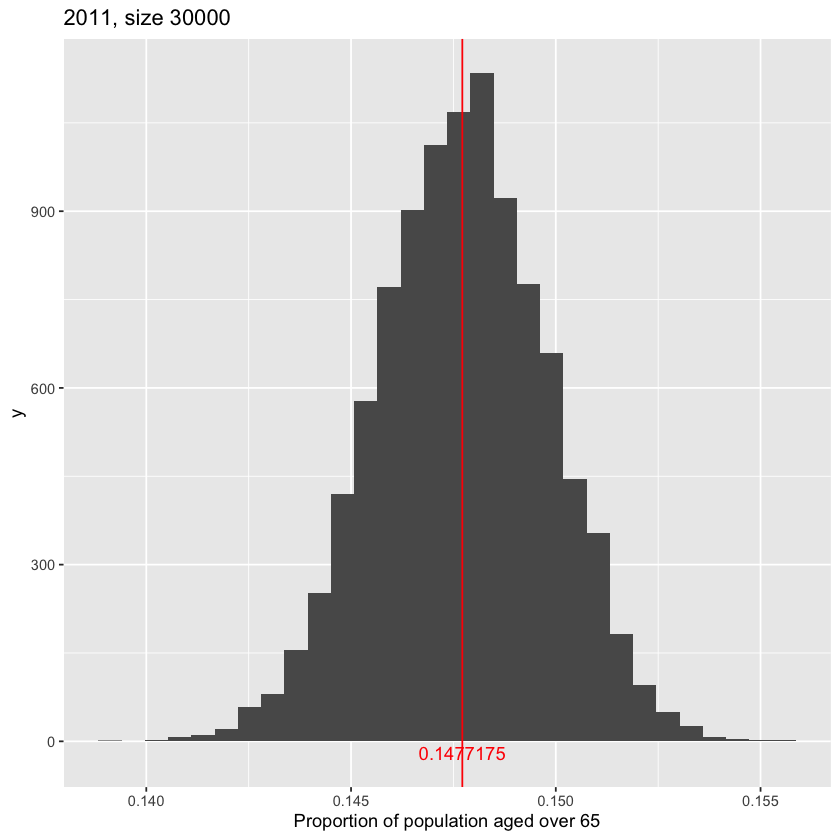

In [92]:
sample300_2011_dist
sample3000_2011_dist
sample30000_2011_dist

In [93]:
set.seed(123)
asy_sample2016_300 <- rep_sample_n(obs_2016, size=300, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2016 = mean(obs_2016 >= 65))
asy_sample2016_3000 <- rep_sample_n(obs_2016, size=3000, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2016 = mean(obs_2016 >= 65))
asy_sample2016_30000 <- rep_sample_n(obs_2016, size=30000, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2016 = mean(obs_2016 >= 65))

In [94]:
sample300_2016_dist <- asy_sample2016_300 %>%
                ggplot(aes(x = prop_over_65_2016)) +
                geom_histogram(bins=30) +
                xlab("Proportion of population aged over 65") +
                ggtitle("2016, size 300")+
                geom_vline(xintercept=mean(asy_sample2016_3000$prop_over_65_2016), color="red")+
                annotate("text", x=mean(asy_sample2016_3000$prop_over_65_2016), y=-20, label="0.168955", color="red")
sample3000_2016_dist <- asy_sample2016_3000 %>%
                ggplot(aes(x = prop_over_65_2016)) +
                geom_histogram(bins=30) +
                xlab("Proportion of population aged over 65") +
                ggtitle("2016, size 3000")+
                geom_vline(xintercept=mean(asy_sample2016_3000$prop_over_65_2016), color="red")+
                annotate("text", x=mean(asy_sample2016_3000$prop_over_65_2016), y=-20, label="0.1688237", color="red")
sample30000_2016_dist <- asy_sample2016_30000 %>%
                ggplot(aes(x = prop_over_65_2016)) +
                geom_histogram(bins=30) +
                xlab("Proportion of population aged over 65") +
                ggtitle("2016, size 30000")+
                geom_vline(xintercept=mean(asy_sample2016_30000$prop_over_65_2016), color="red")+
                annotate("text", x=mean(asy_sample2016_30000$prop_over_65_2016), y=-20, label="0.1688276", color="red")

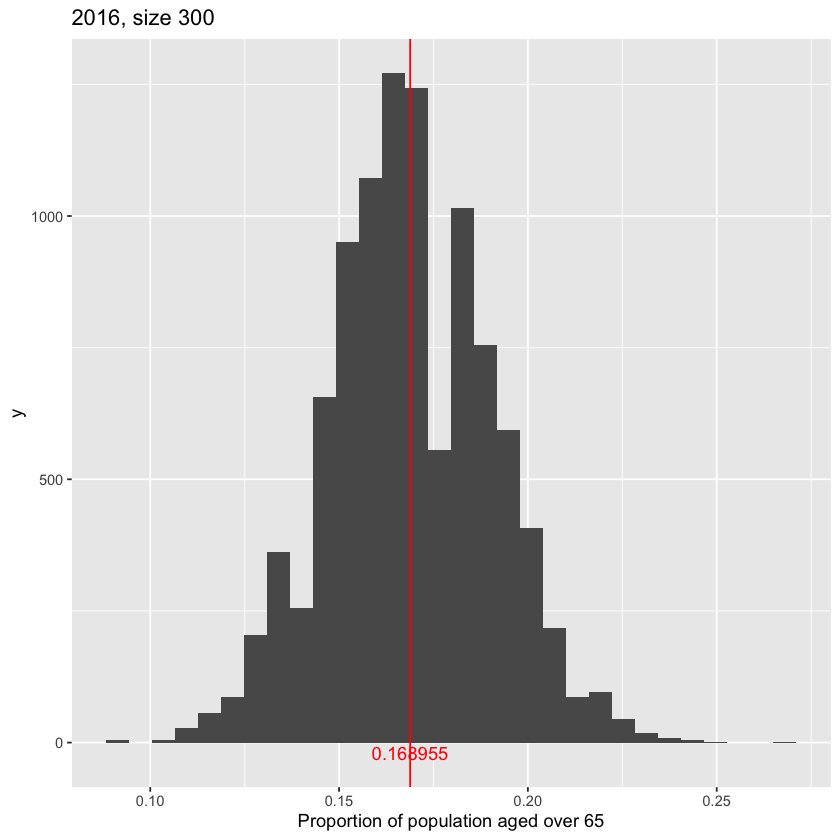

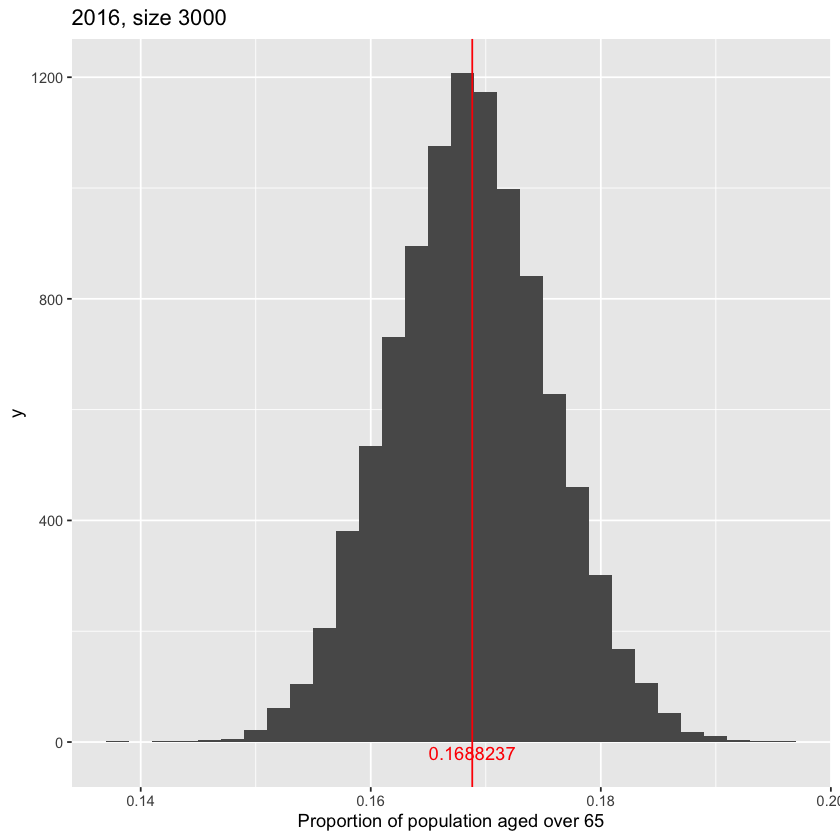

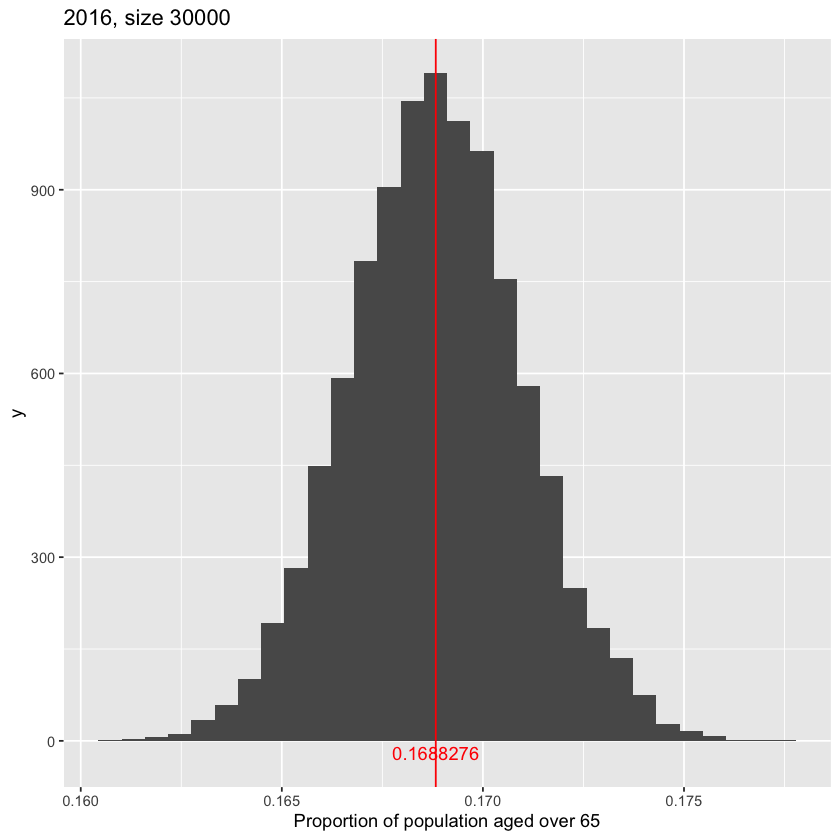

In [95]:
sample300_2016_dist
sample3000_2016_dist
sample30000_2016_dist

In [98]:
sample_estimates300 <- asy_sample2011_300 %>%
             left_join(asy_sample2016_300, by="replicate")
sample_estimates3000 <- asy_sample2011_3000 %>%
             left_join(asy_sample2016_3000, by="replicate")
sample_estimates30000 <- asy_sample2011_30000 %>%
             left_join(asy_sample2016_30000, by="replicate")

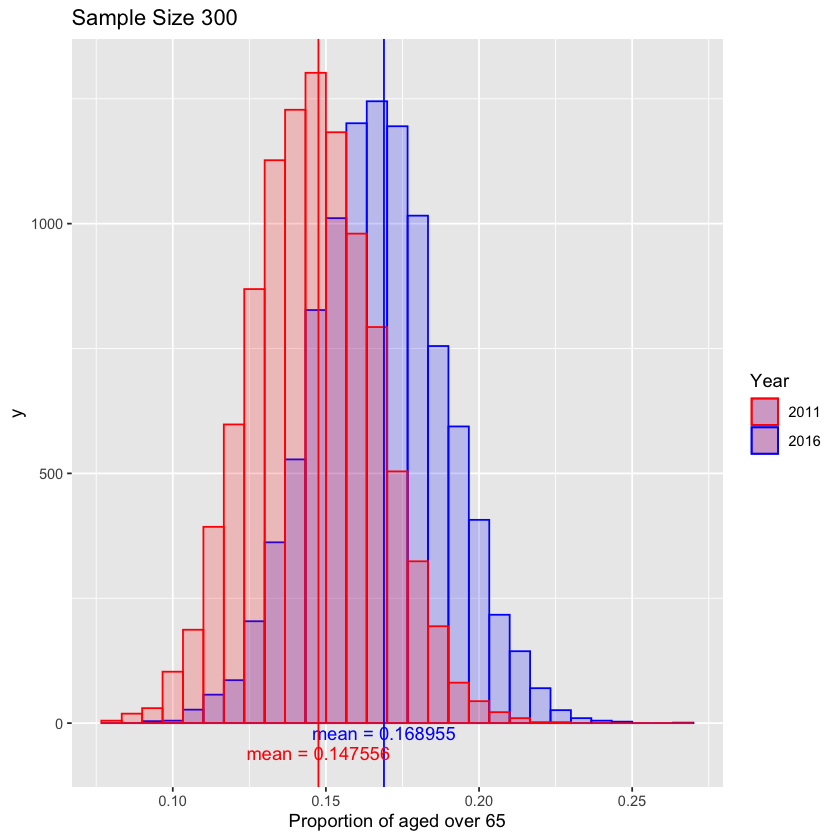

In [134]:
sample300_dist <- sample_estimates300 %>%
  ggplot(group=year) +
  geom_histogram(aes(x = prop_over_65_2016, color="2016"),fill = "blue", bins=30, alpha=0.2) +
  geom_histogram(aes(x = prop_over_65_2011, color="2011"),fill = "red", bins=30, alpha=0.2) +
  xlab("Proportion of aged over 65") +
  ggtitle("Sample Size 300")+
  geom_vline(xintercept=mean(sample_estimates300$prop_over_65_2016), color="blue")+
  annotate("text", x=mean(sample_estimates300$prop_over_65_2016), y=-20, label="mean = 0.168955", color="blue")+
  geom_vline(xintercept=mean(sample_estimates300$prop_over_65_2011), color="red")+
  annotate("text", x=mean(sample_estimates300$prop_over_65_2011), y=-60, label="mean = 0.147556", color="red")+
  scale_color_manual(name='Year',
                     breaks=c('2011', "2016"),
                     values=c('2011'='red', '2016'='blue'))

sample300_dist                

### Method: Plan

In this project, we are trying to analyze if there is a difference in the proportion of population age over 65 in Canada between 2011 and 2016. We will be sampling 10000 samples with the size of 3000 data each year from the population without replacement and draw the sampling distribution of the proportion of the population aged over 65. Then, we will also calculate the standard deviation of the samples. Repeat the analysis above but use the bootstrap sampling method with the size of 30000 again to have more analysis. After that, a hypothesis test will be conducted to test whether the proportion of the population aged over 65 has differences between 2011 and 2016. We will use a two-sample t-test and Wilcoxon rank-sum test to test this since there are two samples. We hope to reject the null hypothesis and show that 2016 has a higher proportion of the population aged over 65 than that in 2011.


Furthermore, depending on the results of our analysis, the results would provide insight into trends in changes in life expectancy in Canada and help predict future demographics in the next five years. Future research could include developing methods to improve old-age support programs. 

### References

- Government of Canada, S. C. (2019, June 17). Data Tables, 2016 census. 2016 Census Data tables – Age (in Single Years) and Average Age (127) and Sex (3) for the Population of Canada, Provinces and Territories, Census Metropolitan Areas and Census Agglomerations, 2016 and 2011 Censuses - 100% Data. https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Rp-eng.cfm?TABID=2&LANG=E&A=R&APATH=3&DETAIL=0&DIM=0&FL=A&FREE=0&GC=01&GL=-1&GID=1235625&GK=1&GRP=1&O=D&PID=109523&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2016&THEME=115&VID=0&VNAMEE=&VNAMEF=&D1=1&D2=0&D3=0&D4=0&D5=0&D6=0


- Ries, N. M. (2010). Canadian institutes of health research -- institute of aging: Profile: Ethics,    health research, and canada's aging population. Canadian Journal on Aging, 29(4), 577-580.



- Yoshino, N., & Miyamoto, H. (2017). Declined effectiveness of fiscal and monetary policies faced with aging population in Japan. Japan and the World Economy, 42, 32–44. https://doi.org/10.1016/j.japwor.2017.06.002 